In [1]:
#importing the module

import numpy as np 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img = cv2.imread('Test images\sharapova1.jpg')
img.shape

(555, 700, 3)

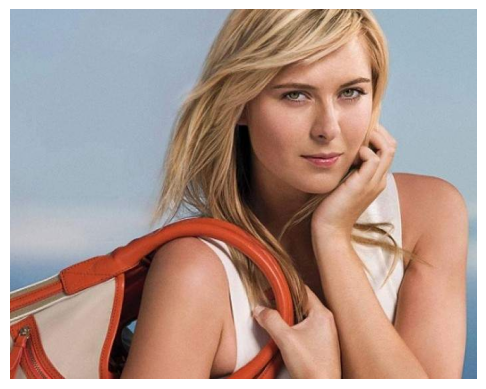

In [3]:
#plot the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) #help to show  color image.
plt.axis('off')
plt.show()

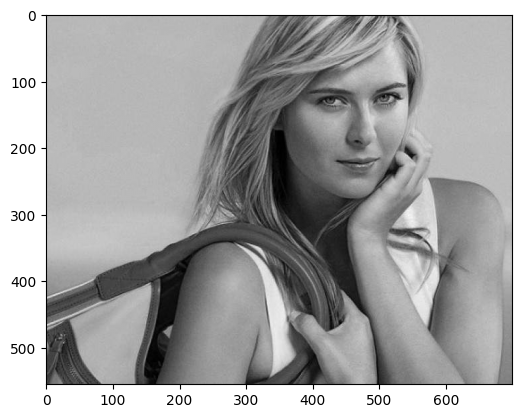

In [4]:
#plot the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray') #help to show grey image.
plt.show()

In [5]:
face_cascasde = cv2.CascadeClassifier('OpenCV\haarcascades\haarcascade_frontalface_default.xml') #Helps to detect front face
eye_cascade = cv2.CascadeClassifier('OpenCV\haarcascades\haarcascade_eye.xml') #helps to detect teh eye

faces = face_cascasde.detectMultiScale(gray, 1.3, 5)

print(f"x - {faces[0][0]}\ny - {faces[0][1]}\nWidth - {faces[0][2]}\nHeight - {faces[0][3]}")

x - 356
y - 37
Width - 233
Height - 233


In [6]:
(x, y, w, h) = faces[0] # storing the values in their respective variables.

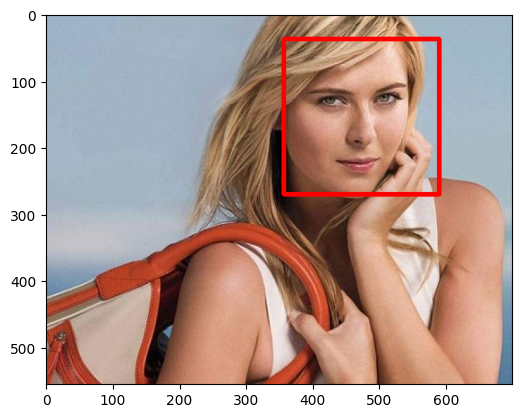

In [7]:
face_img = cv2.rectangle(img, (x, y), (w+x, h+y), color=(255, 0, 0), thickness=5) #Helps to capture te face of image
plt.imshow(face_img)
plt.show()

In [8]:
eye = eye_cascade.detectMultiScale(gray, 1.3, 5)

print(f"x - {eye[0][0]}\ny - {eye[0][1]}\nWidth - {eye[0][2]}\nHeight - {eye[0][3]}\n") #first eye coordinates
print(f"x - {eye[1][0]}\ny - {eye[1][1]}\nWidth - {eye[1][2]}\nHeight - {eye[1][3]}") #second eye coordinates


x - 402
y - 104
Width - 52
Height - 52

x - 487
y - 104
Width - 47
Height - 47


In [9]:
(x1, y1, w1, h1) = eye[0] #storing the first eye coordinates
(x2, y2, w2, h2) = eye[1] #storing the second eye coordinates

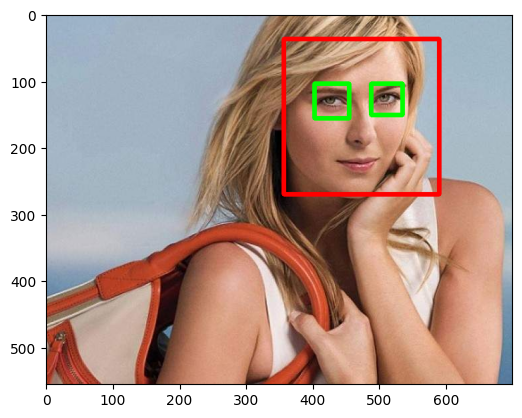

In [10]:
cv2.rectangle(img, (x1,y1), (w1+x1, h1+y1), color=(0, 255, 0), thickness=5) #Helps to capture the first eye of image
cv2.rectangle(img, (x2,y2), (w2+x2, h2+y2), color=(0, 255, 0), thickness=5) #Helps to capture the second eye of image
plt.imshow(img)
plt.show()

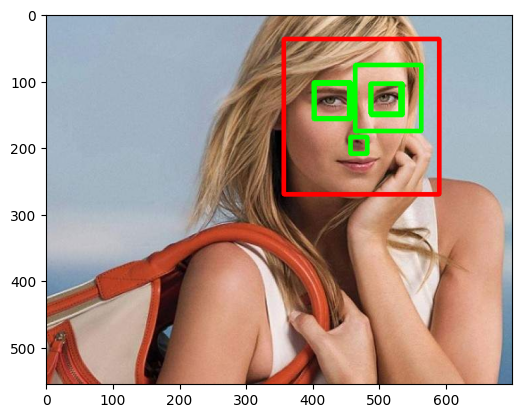

In [11]:
for (x, y, w, h) in faces:

    face_img  = cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=5)
    roi_img = img[y: y+h, x: x+w] #region of intrest
    roi_color = face_img[y: y+h, x: x+w]
    eye = eye_cascade.detectMultiScale(gray)

    for (ex, ey, ew, eh) in eye:
        face_img  = cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), color=(0, 255, 0), thickness=5)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

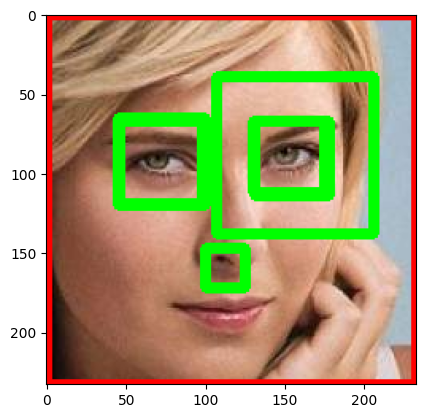

In [12]:
plt.imshow(roi_color, cmap='gray') #This code gives you a crop face
plt.show()

`Detecting face image using a function`

In [13]:
def get_crop_image(image_path):
    print("Reading:", image_path)

    if not os.path.exists(image_path):
        raise ValueError("Invalid image path:", image_path)

    img  = cv2.imread(image_path) # read the image

    if img is None:
        raise ValueError("Image not found invalid path")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascasde.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:

        roi_gray = gray[y : y+h, x : x+w]
        roi_color = img[y : y+h, x : x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes)>=2:
            return roi_color
        
    else:
        return None

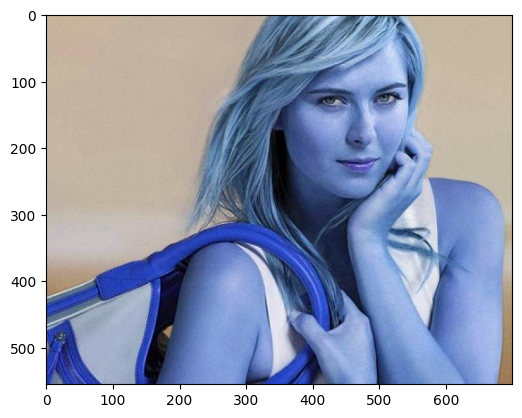

In [14]:
original_image = cv2.imread('Test images\sharapova1.jpg')
plt.imshow(original_image, cmap='gray')
plt.show()

## **Image with clearly `visible eyes`**

Reading: Test images\sharapova1.jpg


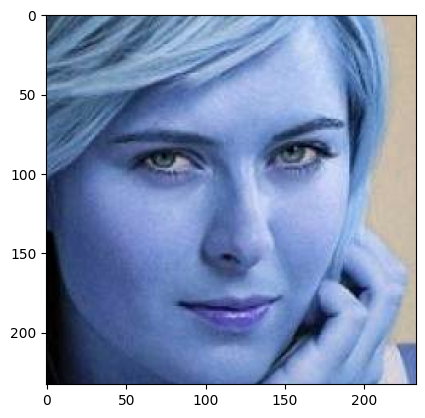

In [15]:
import os
croped_image = get_crop_image('Test images\sharapova1.jpg')
plt.imshow(croped_image)
plt.show()

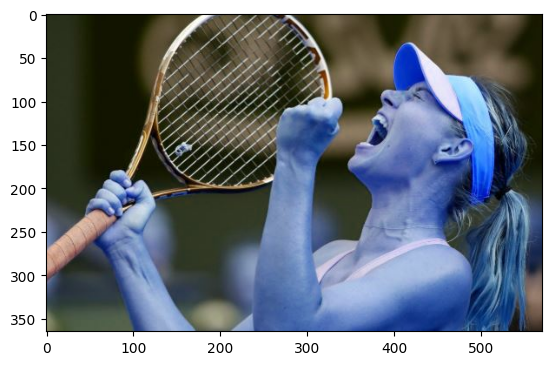

In [16]:
org_img_obstructed  = cv2.imread('Test images\sharapova2 (1).jpg')
plt.imshow(org_img_obstructed)
plt.show()

## **Image with not clearly `visible eyes`**

In [17]:
croped_image_2 = get_crop_image('Test images\sharapova2 (1).jpg')
croped_image_2

Reading: Test images\sharapova2 (1).jpg


In [18]:
path_to_data = './datasets/'
path_to_cr_data = './datasets/cropped/'

In [19]:
import os

img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./datasets/cropped',
 './datasets/john cena images',
 './datasets/messi images',
 './datasets/neymar images',
 './datasets/ronaldo images',
 './datasets/virat kholi images']

In [20]:
import shutil
# Deletes the old 'cropped_faces' folder (if exists) and creates a new one
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_img_dir = []
celebrity_file_names_dir = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name  = img_dir.split('/')[-1]
    print(celebrity_name)


    celebrity_file_names_dir[celebrity_name] = []

    for entry in os.scandir(img_dir):

        if not entry.is_file():
            continue
        
        roi_color = get_crop_image(entry.path)

        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data + celebrity_name)

            if  not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dir.append(cropped_folder)

            cropped_file_name = f"{celebrity_name}_{count}+ .png"
            cropped_file_pth  = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_pth, roi_color)
            celebrity_file_names_dir[celebrity_name].append(cropped_file_pth)

            count += 1

cropped
john cena images
Reading: ./datasets/john cena images\111548077.jpg
Reading: ./datasets/john cena images\111658313.jpg
Reading: ./datasets/john cena images\121346205.jpg
Reading: ./datasets/john cena images\17367976830391.jpg
Reading: ./datasets/john cena images\250px-Cena_March_2018.jpg
Reading: ./datasets/john cena images\250px-John_Cena_2010.jpg
Reading: ./datasets/john cena images\250px-John_Cena_2024.jpg
Reading: ./datasets/john cena images\250px-John_Cena_RR25__28cropped_29.jpg
Reading: ./datasets/john cena images\2r7jf3h8_john-cena_625x300_02_February_25.jpg
Reading: ./datasets/john cena images\3PSKTOB57BES7AYL2OFYEO42QA.jpg
Reading: ./datasets/john cena images\487578_v9_bb.jpg
Reading: ./datasets/john cena images\51GLq-9YloL.jpg
Reading: ./datasets/john cena images\678f2259998e347697a840c0ad71f2c0.jpg
Reading: ./datasets/john cena images\77502508007-raw-01062025-gd-43097.jpg
Reading: ./datasets/john cena images\8a1f7b30-ccc4-11ef-87df-d575b9a434a4.jpg.jpg
Reading: ./dat

## `Wavelet transform` for face detecting features


In [22]:
import pywt

def w2d(img, mode='haar', level=1):

    imArray = img

    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)

    imArray/=255

    # compute coefficient

    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    # process coeffieients

    coeff_H = list(coeffs)
    coeff_H[0] *= 0

    # reconstruction

    imArray_H = pywt.waverec2(coeff_H, mode)
    imArray_H *= 255

    imArray_H  = np.uint8(imArray_H)

    return imArray_H

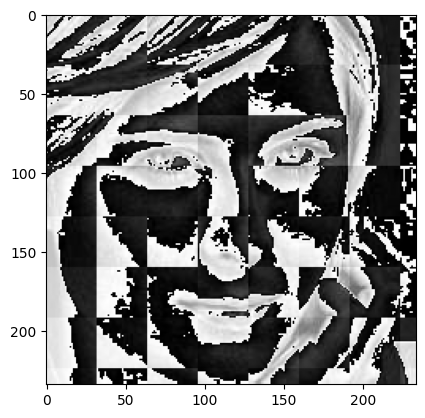

In [23]:
im_har = w2d(croped_image, 'db1', 5)

plt.imshow(im_har, cmap='gray')
plt.show()


In [24]:
celebrity_file_names_dir


{'cropped': [],
 'john cena images': ['./datasets/cropped/john cena images/john cena images_1+ .png',
  './datasets/cropped/john cena images/john cena images_2+ .png',
  './datasets/cropped/john cena images/john cena images_3+ .png',
  './datasets/cropped/john cena images/john cena images_4+ .png',
  './datasets/cropped/john cena images/john cena images_5+ .png',
  './datasets/cropped/john cena images/john cena images_6+ .png',
  './datasets/cropped/john cena images/john cena images_7+ .png',
  './datasets/cropped/john cena images/john cena images_8+ .png',
  './datasets/cropped/john cena images/john cena images_9+ .png',
  './datasets/cropped/john cena images/john cena images_10+ .png',
  './datasets/cropped/john cena images/john cena images_11+ .png',
  './datasets/cropped/john cena images/john cena images_12+ .png'],
 'messi images': ['./datasets/cropped/messi images/messi images_1+ .png',
  './datasets/cropped/messi images/messi images_2+ .png',
  './datasets/cropped/messi images/m

In [26]:
class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dir.keys():
    class_dict[celebrity_name] = count
    count += 1

class_dict

{'cropped': 0,
 'john cena images': 1,
 'messi images': 2,
 'neymar images': 3,
 'ronaldo images': 4,
 'virat kholi images': 5}

In [31]:
X = []

y = []

for celebrity_name, trainig_files in celebrity_file_names_dir.items():
    for training_image in trainig_files:
        img = cv2.imread(training_image) #Read an image

        if img is None:
            continue

        scalled_raw_img = cv2.resize(img, (32, 32)) #raw image

        img_har = w2d(img, 'db1', 5) #Wavelet transform image

        scalled_Img_har = cv2.resize(img_har, (32, 32))

        combined_img = np.vstack(( scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_Img_har.reshape(32 * 32 , 1))) # Stacking the image vertically

        X.append(combined_img)
        y.append(class_dict[celebrity_name])

        

In [32]:
len(X)

70

In [33]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(70, 4096)